In [6]:
import numpy as np
import tensorflow as tf
from tf_tsallis_statistics import *
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
tf.reset_default_graph()
mu_dummy = tf.get_variable("mu",shape=(1000,2))

q_ph = tf.placeholder(tf.float32,shape=())
x_ph = tf.placeholder(tf.float32,shape=(None,2))

log_std = tf.constant([[-10.0,-10.0]])
mu = tf.constant([[0.0,0.0]])
std = tf.exp(log_std)

x_sample = mu+std*tf_random_q_normal(tf.shape(mu_dummy),q_ph)
pdf = tf_q_gaussian_distribution(x_ph,mu,log_std,q_ph)
sess = tf.Session()

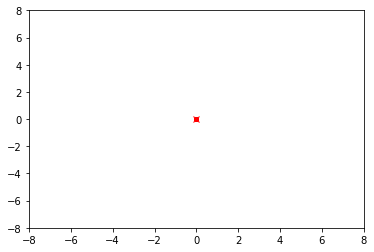

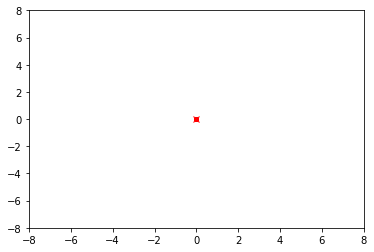

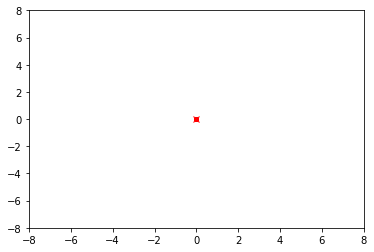

In [8]:
x = np.linspace(-8,8,num=100)
y = np.linspace(-8,8,num=100)
X,Y = np.meshgrid(x,y)

x_points = np.concatenate([X.reshape([-1,1]),Y.reshape([-1,1])],axis=1)

x_samples,pdf_points = sess.run([x_sample,pdf],feed_dict={x_ph:x_points,q_ph:1})
max_pdf = np.max(pdf_points[:])
# print(np.isnan(pdf_points[:]).any())
pdf_points = pdf_points.reshape([100,100])
plt.plot(x_samples[:,0],x_samples[:,1],'r.')
plt.contour(X,Y,pdf_points)
# plt.clim([0,max_pdf])
# plt.colorbar()
plt.plot(0.0,0.0,'rx')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.show()

x_samples,pdf_points = sess.run([x_sample,pdf],feed_dict={x_ph:x_points,q_ph:0})
pdf_points = pdf_points.reshape([100,100])
plt.plot(x_samples[:,0],x_samples[:,1],'r.')
plt.contour(X,Y,pdf_points)
# plt.clim([0,max_pdf])
# plt.colorbar()
plt.plot(0.0,0.0,'rx')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.show()

x_samples,pdf_points = sess.run([x_sample,pdf],feed_dict={x_ph:x_points,q_ph:-2})
pdf_points = pdf_points.reshape([100,100])
plt.plot(x_samples[:,0],x_samples[:,1],'r.')
plt.contour(X,Y,pdf_points)
# plt.clim([0,max_pdf])
# plt.colorbar()
plt.plot(0.0,0.0,'rx')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.show()

In [9]:
tf.reset_default_graph()
mu_dummy = tf.get_variable("mu",shape=(1000,1))

q_ph = tf.placeholder(tf.float32,shape=())
x_ph = tf.placeholder(tf.float32,shape=(None,1))

mu = tf.constant([[0.0]])
log_std = tf.constant([[-2.0]])
std = tf.exp(log_std)

x_sample = mu+std*tf_random_q_normal(tf.shape(x_ph),q_ph)
pdf = tf_q_gaussian_distribution(x_ph,mu,log_std,q_ph)
center = tf_q_gaussian_distribution(tf.constant([[0.0]]),tf.constant([[0.0]]),tf.constant([[0.0]]),q_ph)
sess = tf.Session()

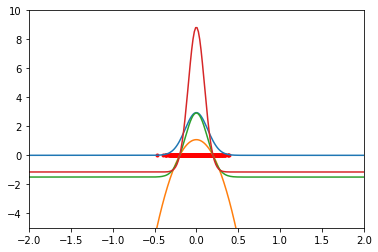

In [10]:
x = np.linspace(-8,8,num=1000)
x = np.reshape(x,[-1,1])

x_samples,pdf_points,log_pdf_points = sess.run([x_sample,pdf,tf_log_q(pdf,1.0)],feed_dict={x_ph:x,q_ph:1})
plt.plot(x_samples,np.zeros_like(x_samples),'r.')
plt.plot(x,pdf_points)
plt.plot(x,log_pdf_points)

x_samples,pdf_points,log_pdf_points = sess.run([x_sample,pdf,tf_log_q(pdf,0.0)],feed_dict={x_ph:x,q_ph:1})
plt.plot(x,1.5*log_pdf_points)

x_samples,pdf_points,log_pdf_points = sess.run([x_sample,pdf,tf_log_q(pdf,-1.0)],feed_dict={x_ph:x,q_ph:1})
plt.plot(x,2.3*log_pdf_points)
plt.xlim([-2,2])
plt.ylim([-5,10])
plt.show()